# Klasifikasi Comment di Chatbot
**Test :**
1. Buat rancangan klasifikasi yang mempresentasikan tema-tema kalimat yang diucapkan tersebut,
2. Membuat rancangan preprocessing data agar klasifikasi berjalan dengan baik
3. Membuat rancangan feature yang dipilih agar klasifikasi berjalan dengan baik

Note  : Rancangan yang diajukan berisi penjelasan / klasifikasi dan sudah dalam bentuk code python

**Concept :**
- Classification uses a score/sentiment, si in this case every word in each text will be predict.

**Step to classification chatbot comment :**

1. Import Libraries
2. Dataset Loading
3. Preview and Check Dataset
4. Cleaning Dataset
5. Data Preprocessing
	- 5.1 change teks to lower alphabet
	- 5.2 drop punctuation and useless character
	- 5.3 drop stopwords
	- 5.4 stemming
6. Word processing
	- 6.1 Create word dictionary
	- 6.2 Import Lexicon Data
	- 6.3 WordCloud
	- 6.4 Score
7. Exploratory Data Analysis (EDA)
8. Tokenization & Text Embedding
	- 8.1 Split into train, test, and validation data
	- 8.2 Bags Of Word model
	- 8.3 Term Frequency-Inverse Document Frequency model (TFIDF)
	- 8.4 Embedding Layer in Deep Learning with Tensorflow 
	- 8.5 Model Definition and Training the dataset
9. Model Evaluation
	- 9.1 RandomForest Classifier Test-set
	- 9.2 MultinomialNB Test-set
10. Model Validation
	- 10.1 Load Test-Set
	- 10.2 Prediction
	- 10.3 Compare between sentiment before and after using model
	- 10.4 Classification Report
11. Conclusion

## 1. Import Libraries

In [73]:
# Common Libraries
!pip install -q pysastrawi

import os
import string
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Preprocessing
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from wordcloud import WordCloud
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Shuffle Dataframe
from sklearn.utils import shuffle

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

# Model
import tensorflow as tf 
from tensorflow import keras
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from tensorflow.keras.layers import TextVectorization, Embedding
from tensorflow.keras import Model
from tensorflow.keras import Input
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import Dropout, BatchNormalization
from sklearn.metrics import classification_report
from keras.utils.np_utils import to_categorical


nltk.download('stopwords')
nltk.download('punkt')

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/macpro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/macpro/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## 2. Dataset Loading

In [74]:
# import dataset

data = pd.read_csv('test-01.csv')

> dataset have 391 rows and 1 columns of chatbot's comments

## 3. Preview and Check Dataset 

let's make sure the dataset has been upoloaded properly

In [75]:
# check shape of dataset
print('shape of dataset:', data.shape)

shape of dataset: (391, 1)


In [76]:
# preview 5 head dataset
data.head(5)

,text
0,Makasii ????
1,Sekarang jam berapa ya?
2,Hp gua udah 4g gausah diaktifin lagi
3,Semlekom
4,Sejag kapan nama saiia blue (Har Har)


In [77]:
# preview 5 tail dataset
data.tail(5)

,text
386,Punya anjir. Bacod mulu dari tadi
387,Terima kasih atas infonya bak
388,Can you speak English ?
389,Namanya siapa?
390,Mana gua tau selesai


In [78]:
# check randomly dataset 
data.sample(5)

,text
129,Rumahnya di mana?
186,Saya mau menyampaikan keluhan
34,it hole the Herat break losing I am cry
176,Okeyv
143,Thanks (love)


In [79]:
# info dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    391 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


- all text on dataset are object 

In [80]:
# describe dataset

data.describe()

,text
count,391
unique,389
top,Hi
freq,2


dataset describe :
- dataset have 391 comments include the name of column name
- 389 of unique values, so we have 2 text as duplicate text
- the duplicate text are "Hi", frequency are twice

## 4. Cleaning Dataset

In [81]:
# check missing values

data.isna().sum()

text    0
dtype: int64

dataset have no missing value

In [82]:
# check dataset have duplicate or not

data.duplicated().unique()

array([False,  True])

dataset have 2 text duplicated, "HI" as a duplicate text

In [83]:
# check text by index

data.loc[1,'text']

'Sekarang jam berapa ya?'

## 5. Data Preprocessing

**Case Folding in Data Preprocessing :**

> - 5.1. change teks to lower alphabet
> - 5.2 drop punctuation and useless character
> - 5.3 drop stopwords
> - 5.4 stemming

In [84]:
# Inisialisasi fitur kategorik
categorical_features = [feature for feature in data.columns if ((data[feature].dtypes=='O'))]

# length each feature
for feature in categorical_features:
    print('{} got categorical values {}'.format(feature,len(data[feature].unique())))

print("categorical features:",len(categorical_features))

text got categorical values 389
categorical features: 1


### 5.1 Change  Lowercase

In [85]:
# Mengubah teks menjadi Lower Case
# sample [1]
teks = data.text[1]
teks_lower = teks.lower()
teks_lower

'sekarang jam berapa ya?'

### 5.2 Drop Punctuation

In [86]:
# Clean Data Function
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower() # make text to lower case
    text = re.sub('\[.*?\]', '', text) # drop text in square brackets
    text = re.sub('https?://\S+|www\.\S+', '', text) # drop links
    text = re.sub('<.*?>+', '', text) # drop <>
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # drop punctuatuion 
    text = re.sub('\n', '', text) # drop enter / new line
    text = re.sub('\w*\d\w*', '', text) # drop Character 
    return text

### 5.3 Drop Stopwords

In [87]:
# drop stopwords

stpwds_id = list(set(stopwords.words('indonesian')))
stpwds_id.append('Makasii')

tokens = word_tokenize(teks)

teks_stopwords = ' '.join([word for word in tokens if word not in stpwds_id])
teks_stopwords

'Sekarang jam ya ?'

### 5.4 Stemming

In [88]:
# Stemming

factory = StemmerFactory()
stemmer = factory.create_stemmer()

teks_stemm = stemmer.stem(teks_stopwords)
teks_stemm

'sekarang jam ya'

In [89]:
# Applying clean_text function to data
train = data.copy()
train['text'] = train['text'].apply(lambda x:clean_text(x))

In [90]:
data['clean_text'] = data['text'].apply(lambda x: clean_text(x))
data

,text,clean_text
0,Makasii ????,makasii
1,Sekarang jam berapa ya?,sekarang jam berapa ya
2,Hp gua udah 4g gausah diaktifin lagi,hp gua udah gausah diaktifin lagi
3,Semlekom,semlekom
4,Sejag kapan nama saiia blue (Har Har),sejag kapan nama saiia blue har har
...,...,...
386,Punya anjir. Bacod mulu dari tadi,punya anjir bacod mulu dari tadi
387,Terima kasih atas infonya bak,terima kasih atas infonya bak
388,Can you speak English ?,can you speak english
389,Namanya siapa?,namanya siapa


in the text feature we get the original text and next to it is clean_text, it through step of preprocessing text.

## 6. Text Processing

**There are steps of Word Proessing :**
> - 6.1 Create word dictionary
> - 6.2 Import Lexicon Data
> - 6.3 WordCloud

### 6.1 Create Word Dictionary

In [91]:
# Create word dictionary

word_dict = {}
for i in range(0,len(data['text'])):
    sentence = data['text'][i]
    word_token = word_tokenize(sentence)
    for j in word_token:
        if j not in word_dict:
            word_dict[j] = 1
        else:
            word_dict[j] += 1

In [92]:
len(word_dict)

593

In [93]:
len({k:v for (k,v) in word_dict.items()if v < 4})

536

### 6.2 Import Lexicon Data

The lexicon is kamusalay.csv and include swear words which has the score
source : 
 - https://github.com/nasalsabila/kamus-alay/blob/master/colloquial-indonesian-lexicon.csv
 - https://github.com/evanmartua34/Twitter-COVID19-Indonesia-Sentiment-Analysis---Lexicon-Based/blob/master/Analysis.ipynb

In [94]:
negasi = ['bukan','tidak','ga','gk']
lexicon = pd.read_csv('kamusalay.csv')
lexicon = lexicon.drop(lexicon[(lexicon['formal'] == 'bukan')
                               |(lexicon['formal'] == 'tidak')
                               |(lexicon['formal'] == 'ga')|(lexicon['formal'] == 'gk') ].index,axis=0)
lexicon = lexicon.reset_index(drop=True)

In [95]:
len(lexicon)

14909

In [96]:
lexicon_word = lexicon['formal'].to_list()
lexicon_num_words = lexicon['In-dictionary']

In [97]:
def del_word(x,key_list) :
    n = len(key_list)
    word_tokens = word_tokenize(x)
    new_x=''
    for word in word_tokens:
        if word not in key_list:
            new_x = new_x+word+' '
    return new_x

Checking if there is words in dictionary that does not include in the lexicon

In [98]:
ns_words = []
factory = StemmerFactory()
stemmer = factory.create_stemmer()
for word in word_dict.keys():
    kata_dasar = stemmer.stem(word)
    if word not in lexicon_word:
        ns_words.append(word)
len(ns_words)

447

In [99]:
len({k:v for (k,v) in word_dict.items() if ((k in ns_words)&(v>3))})

35

In [100]:
ns_words_list = len({k:v for (k,v) in word_dict.items() if ((k in ns_words)&(v>3))})

In [101]:
word_to_plot = data['text'].copy()

In [102]:
word_to_plot_1 = word_to_plot.apply(lambda x: del_word(x, negasi))

### 6.3 WordCloud

WordCloud is an image that shows a list of words used in a text. Generally more words are used to increae the size of those words in the image.

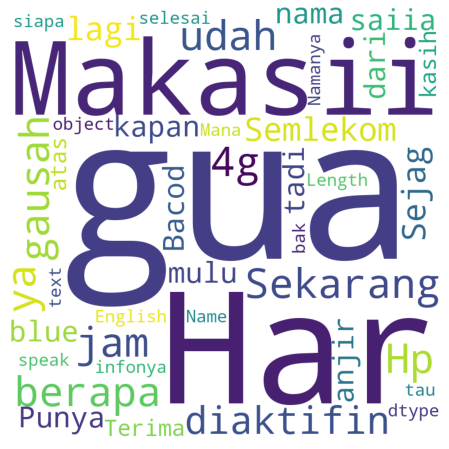

In [103]:
# Make WordCloud
wordcloud = WordCloud(width = 800, height = 800, background_color = 'white', max_words = 1000
                      , min_font_size = 20).generate(str(word_to_plot_1))

# Plot the word cloud
fig = plt.figure(figsize= (8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### 6.4 Score

In [104]:
lexicon['In-dictionary'].value_counts()

1    13625
0     1284
Name: In-dictionary, dtype: int64

In [105]:
sencol =[]
senrow =np.array([])
nsen = 0
factory = StemmerFactory()
stemmer = factory.create_stemmer()
sentiment_list = []
# function to write the word's sentiment if it is founded
def found_word(ind,words,word,sen,sencol,sentiment,add):
    # if it is already included in the bag of words matrix, then just increase the value
    if word in sencol:
        sen[sencol.index(word)] += 1
    else:
    #if not, than add new word
        sencol.append(word)
        sen.append(1)
        add += 1
    #if there is a negation word before it, the sentiment would be the negation of it's sentiment
    if (words[ind-1] in negasi):
        sentiment += -lexicon['In-dictionary'][lexicon_word.index(word)]
    else:
        sentiment += lexicon['In-dictionary'][lexicon_word.index(word)]
    
    return sen,sencol,sentiment,add
            
# checking every words, if they are appear in the lexicon, and then calculate their sentiment if they do
for i in range(len(data)):
    nsen = senrow.shape[0]
    words = word_tokenize(data['text'][i])
    sentiment = 0 
    add = 0
    prev = [0 for ii in range(len(words))]
    n_words = len(words)
    if len(sencol)>0:
        sen =[0 for j in range(len(sencol))]
    else:
        sen =[]
    
    for word in words:
        ind = words.index(word)
        # check whether they are included in the lexicon
        if word in lexicon_word :
            sen,sencol,sentiment,add= found_word(ind,words,word,sen,sencol,sentiment,add)
        else:
        # if not, then check the root word
            kata_dasar = stemmer.stem(word)
            if kata_dasar in lexicon_word:
                sen,sencol,sentiment,add= found_word(ind,words,kata_dasar,sen,sencol,sentiment,add)
        # if still negative, try to match the combination of words with the adjacent words
            elif(n_words>1):
                if ind-1>-1:
                    back_1    = words[ind-1]+' '+word
                    if (back_1 in lexicon_word):
                        sen,sencol,sentiment,add= found_word(ind,words,back_1,sen,sencol,sentiment,add)
                    elif(ind-2>-1):
                        back_2    = words[ind-2]+' '+back_1
                        if back_2 in lexicon_word:
                            sen,sencol,sentiment,add= found_word(ind,words,back_2,sen,sencol,sentiment,add)
    # if there is new word founded, then expand the matrix
    if add>0:  
        if i>0:
            if (nsen==0):
                senrow = np.zeros([i,add],dtype=int)
            elif(i!=nsen):
                padding_h = np.zeros([nsen,add],dtype=int)
                senrow = np.hstack((senrow,padding_h))
                padding_v = np.zeros([(i-nsen),senrow.shape[1]],dtype=int)
                senrow = np.vstack((senrow,padding_v))
            else:
                padding =np.zeros([nsen,add],dtype=int)
                senrow = np.hstack((senrow,padding))
            senrow = np.vstack((senrow,sen))
        if i==0:
            senrow = np.array(sen).reshape(1,len(sen))
    # if there isn't then just update the old matrix
    elif(nsen>0):
        senrow = np.vstack((senrow,sen))
        
    sentiment_list.append(sentiment)

In [106]:
len(sentiment_list)

391

In [107]:
print(senrow.shape[0])

391


contruction th edata frame that contain bag of word and the sentiments that have been calculate before

In [108]:
sencol_sent = sencol.append('sentiment')
sencol_sent

In [109]:
sentiment_array = np.array(sentiment_list).reshape(senrow.shape[0],1)
sentiment_data = np.hstack((senrow,sentiment_array))
data_sen = pd.DataFrame(sentiment_data, sencol_sent)

In [110]:
sentiment_array = np.array(sentiment_list).reshape(senrow.shape[0],1)
sentiment_data = np.hstack((senrow,sentiment_array))
data_sen = pd.DataFrame(sentiment_data, columns = sencol)

In [111]:
data_sen.head(10)

,sekarang,berapa,ya,gua,lagi,kapan,nama,mana,tau,bisa,...,pacar,tadi,oh,begitu,entah,cepat,butuh,parah,dari,sentiment
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2
5,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,2
6,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


There are score of words in each text in dataset

**let's see if the sentiments is correct by look at the text**

In [112]:
new_data = pd.DataFrame([])
new_data['text'] = data['text'].copy()
new_data['sentiment'] = data_sen['sentiment'].copy()

In [113]:
new_data.head(10)

,text,sentiment
0,Makasii ????,0
1,Sekarang jam berapa ya?,3
2,Hp gua udah 4g gausah diaktifin lagi,2
3,Semlekom,0
4,Sejag kapan nama saiia blue (Har Har),2
5,Mana gw tau anying,2
6,Nggak bisa di klik,2
7,ngga udah,0
8,no,0
9,Saya Mau Complient ...,2


## 7. Exploratory Data Analysis (EDA)

Text(0.5, 0, 'sentiment')

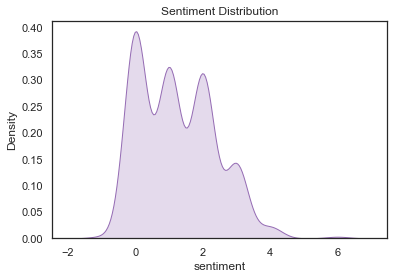

In [114]:
sns.set(style="white", palette = "muted", color_codes = True)
sns.kdeplot(data_sen['sentiment'], color = 'm', shade = True)
plt.title('Sentiment Distribution')
plt.xlabel('sentiment')

Skewness distribution, dataset has a tail in keft side of graph

In [115]:
data_sen.describe()

,sekarang,berapa,ya,gua,lagi,kapan,nama,mana,tau,bisa,...,pacar,tadi,oh,begitu,entah,cepat,butuh,parah,dari,sentiment
count,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,...,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000
mean,0.007673,0.015345,0.038363,0.010230,0.015345,0.002558,0.007673,0.069054,0.023018,0.038363,...,0.002558,0.005115,0.002558,0.002558,0.002558,0.002558,0.002558,0.002558,0.002558,1.227621
std,0.087369,0.123079,0.192318,0.100755,0.123079,0.050572,0.087369,0.253870,0.150152,0.192318,...,0.050572,0.071428,0.050572,0.050572,0.050572,0.050572,0.050572,0.050572,0.050572,1.117164
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000


In [116]:
px.pie(data_sen, 'sentiment')

Description pie chart :
- 0 sentiment is the most, for the determination of the data classification is not netral, positif, negatif, but we according to the words that appear in the test. If the 0 sentiment is the most, there is lack of vocabulary in the dictionary used.
- We have -1 Sentiment, it look bad vocab used in the comment

## 8. Tokenization & Text Embedding

### 8.1 Split into train, test, and validation data

In [117]:
# Split into train and test
X = new_data.text
y = new_data.sentiment

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2)

X_train, X_val, y_train, y_val = train_test_split(X_train_full,
                                                  y_train_full,
                                                  shuffle=True, test_size=0.2)
print("Training data shape: {}".format(X_train.shape))
print("Validation data shape: {}".format(X_val.shape))
print("Testing data shape: {}".format(X_test.shape))


Training data shape: (249,)
Validation data shape: (63,)
Testing data shape: (79,)


### 8.2 Bags Of Word model

In [118]:
# Bags Of Word model
# it is used to conver text documents to numerical vector or bag of words

Vectorize = CountVectorizer()
X_train_vec = Vectorize.fit_transform(X_train)
X_test_vec = Vectorize.transform(X_test)
X_val_vec = Vectorize.transform(X_val)

print('BOW X_train : ', X_train_vec.shape)
print('BOW X_test : ', X_test_vec.shape)
print('BOW X_val : ', X_val_vec.shape)

BOW X_train :  (249, 357)
BOW X_test :  (79, 357)
BOW X_val :  (63, 357)


### 8.3 Term Frequency-Inverse Document Frequency model (TFIDF)
- It is used to convert text documents to matrix of tfidf features.

In [119]:
# Tfidf vectorizer
Transformer = TfidfTransformer()

# transformed train reviews
X_train_tfidf = Transformer.fit_transform(X_train_vec)

# transformed test reviews
X_test_tfidf = Transformer.transform(X_test_vec)

# transformed test reviews
X_val_tfidf = Transformer.transform(X_val_vec)

print('X_train_tfidf shape : ', X_train_vec.shape)
print('X_test_tfidf shape : ', X_test_vec.shape)
print('X_val_tfidf shape : ', X_val_vec.shape)

X_train_tfidf shape :  (249, 357)
X_test_tfidf shape :  (79, 357)
X_val_tfidf shape :  (63, 357)


### 8.4 Embedding Layer in Deep Learning with Tensorflow

In [120]:
# jml_vocab = len(Vectorize.vocabulary_.keys())
# max_sen_len = max([len(i.split(" ")) for i in X_train])

# print("word count:",jml_vocab)
# print("Maximum sentence length:",max_sen_len,"word")

In [121]:
# # Text Vectorization is the process of converting text into numerical representation

# text_vectorization = TextVectorization(max_tokens=jml_vocab,
#                                        standardize="lower_and_strip_punctuation",
#                                        split="whitespace",
#                                        ngrams=None,
#                                        output_mode="int",
#                                        output_sequence_length=max_sen_len,
#                                        input_shape=(1,)
#                                        )

# text_vectorization.adapt(X_train)

In [122]:
# text_vectorization([data.text[1]])

In [123]:
# text_vectorization.get_vocabulary()[1]

In [124]:
# # embeding parameter

# embedding = Embedding(input_dim=jml_vocab,
#                       output_dim=128,
#                       embeddings_initializer="uniform",
#                       input_length=max_sen_len
#                       )

In [125]:
# # embedding result

# emb_res = embedding(text_vectorization([data.text[0]]))
# emb_res

**Preprocessing for modeling Deep Learning - Fully Connected Layer**

In [126]:
# # encoding for categorical data
# y_train_ohe = to_categorical(y_train)
# y_test_ohe = to_categorical(y_test)

In [127]:
# # let's check categorical data
# y_train_ohe
# pd.get_dummies(y_train)

**Pipeline**

In [128]:
# AUTOTUNE = tf.data.AUTOTUNE

In [129]:
# def get_batches(X, y, shuffle_buffer_size, batch_size, shuffle=False):
#   data_ds = tf.data.Dataset.from_tensor_slices((X,y))
#   preprocessed_data=data_ds
#   data_batches = preprocessed_data.batch(batch_size).cache().prefetch(AUTOTUNE)

#   return data_batches

In [130]:
# # BoW
# training_BoW = get_batches(X_train, y_train_ohe,X_train.shape[0], 32, shuffle=True)
# test_BoW = get_batches(X_test, y_test_ohe,X_test.shape[0], 32, shuffle=True)
# # TFIDF
# training_tfidf = get_batches(X_train_tfidf.todense(), y_train_ohe,X_train_tfidf.shape[0], 32, shuffle=True)
# test_tfidf = get_batches(X_test_tfidf.todense(), y_test_ohe,X_test_tfidf.shape[0], 32, shuffle=True)

### 8.5 Model Definition and Training the dataset

**- Machine Learning**

> **RandomForest Classifier**

In [131]:
# RandomForest Classifier
rf = RandomForestClassifier()
# fitting the model for bag of words
rf_bow = rf.fit(X_train_vec, y_train)
print(rf_bow)
# fitting the model for tfidf
rf_tfidf = rf.fit(X_train_tfidf, y_train)


RandomForestClassifier()


In [132]:
# RandomForestClassifier
print('----------classification report for Bow RandomForestClassifier----------')
print(classification_report(y_train, rf.predict(X_train_vec)))

print('----------classification report for TFDIF RandomForestClassifier----------')
print(classification_report(y_train, rf.predict(X_train_tfidf)))

----------classification report for Bow RandomForestClassifier----------
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        89
           1       0.86      0.97      0.91        65
           2       0.92      0.92      0.92        60
           3       0.83      0.81      0.82        31
           4       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         1

    accuracy                           0.92       249
   macro avg       0.60      0.61      0.60       249
weighted avg       0.90      0.92      0.91       249

----------classification report for TFDIF RandomForestClassifier----------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       1.00      0.98      0.99        65
           2       1.00      1.00      1.00        60
           3       0.97      1.00      0.98        31
           4       1.00      1.00     

the training result of RandomForest Classifier is TFDIF. The recall is almost get 100% each classification. But the model have overfit potential.

> **MultinomialNB**

In [133]:
nb = MultinomialNB()

# MultinomialNB

# fitting the model for bag of words
nb_bow = nb.fit(X_train_vec, y_train)
print(nb_bow)
# fitting the model for tfidf
nb_tfidf = nb.fit(X_train_tfidf, y_train)

# MultinomialNB
print('----------classification report for Bow MultinomalNB----------')
print(classification_report(y_train, nb.predict(X_train_vec)))

print('----------classification report for TFDIF MultinomalNB----------')
print(classification_report(y_train, nb.predict(X_train_tfidf)))


MultinomialNB()
----------classification report for Bow MultinomalNB----------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        89
           1       0.94      0.92      0.93        65
           2       0.85      0.97      0.91        60
           3       0.86      0.77      0.81        31
           4       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         1

    accuracy                           0.92       249
   macro avg       0.61      0.61      0.61       249
weighted avg       0.91      0.92      0.92       249

----------classification report for TFDIF MultinomalNB----------
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        89
           1       0.94      0.94      0.94        65
           2       0.84      0.97      0.90        60
           3       0.94      0.48      0.64        31
           4       0.00      0.00      0.0

In multinomialNB classification report have 0 score in recall. very few data to support in class 4 anda class 6, so the model only learn a few data.

## 9. Model Evaluation

### 9.1 RandomForest Classifier Test-set

In [134]:
# RandomForestClassifier
print('----------classification report for Bow RandomForestClassifier----------')
print(classification_report(y_test, rf.predict(X_test_tfidf)))

print('----------classification report for TFDIF RandomForestClassifier----------')
print(classification_report(y_test, rf.predict(X_test_tfidf)))

----------classification report for Bow RandomForestClassifier----------
              precision    recall  f1-score   support

           0       0.62      0.96      0.75        25
           1       0.53      0.43      0.47        21
           2       0.50      0.36      0.42        22
           3       0.14      0.14      0.14         7
           4       0.00      0.00      0.00         4

    accuracy                           0.53        79
   macro avg       0.36      0.38      0.36        79
weighted avg       0.49      0.53      0.49        79

----------classification report for TFDIF RandomForestClassifier----------
              precision    recall  f1-score   support

           0       0.62      0.96      0.75        25
           1       0.53      0.43      0.47        21
           2       0.50      0.36      0.42        22
           3       0.14      0.14      0.14         7
           4       0.00      0.00      0.00         4

    accuracy                         

- Result of Randomforest Test-set is underfit.

### 9.2 MultinomialNB Test-set

In [135]:
nb = MultinomialNB()

# MultinomialNB

# fitting the model for bag of words
nb_bow = nb.fit(X_train_vec, y_train)
print(nb_bow)
# fitting the model for tfidf
nb_tfidf = nb.fit(X_train_tfidf, y_train)

# MultinomialNB
print('----------classification report for Bow MultinomalNB----------')
print(classification_report(y_test, nb.predict(X_test_vec)))

print('----------classification report for TFDIF MultinomalNB----------')
print(classification_report(y_test, nb.predict(X_test_tfidf)))


MultinomialNB()
----------classification report for Bow MultinomalNB----------
              precision    recall  f1-score   support

           0       0.65      0.88      0.75        25
           1       0.33      0.29      0.31        21
           2       0.39      0.41      0.40        22
           3       0.25      0.14      0.18         7
           4       0.00      0.00      0.00         4

    accuracy                           0.48        79
   macro avg       0.32      0.34      0.33        79
weighted avg       0.42      0.48      0.45        79

----------classification report for TFDIF MultinomalNB----------
              precision    recall  f1-score   support

           0       0.58      0.88      0.70        25
           1       0.33      0.29      0.31        21
           2       0.38      0.36      0.37        22
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         4

    accuracy                           0.

- Result of MultinomialNB  Test-set is underfit.

## 10. Model Validation

### 10.1 Load Test-Set

In [136]:
print('----------classification report for TFDIF RandomForestClassifier----------')
print(classification_report(y_val, rf.predict(X_val_tfidf)))

----------classification report for TFDIF RandomForestClassifier----------
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         1
           0       0.47      1.00      0.64        15
           1       0.44      0.21      0.29        19
           2       0.40      0.30      0.34        20
           3       0.14      0.12      0.13         8

    accuracy                           0.41        63
   macro avg       0.29      0.33      0.28        63
weighted avg       0.39      0.41      0.36        63



### 10.2 Prediction

We have no the good model, so we choose random forest classifier to predict Validation dataset.

In [137]:
# X_val prediction 

y_pred_val = rf.predict(X_val_tfidf)
y_pred_val

array([0, 3, 0, 0, 3, 0, 0, 0, 0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 0, 0, 2, 1,
       2, 0, 2, 3, 1, 0, 1, 2, 0, 0, 2, 3, 0, 2, 2, 1, 3, 3, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 3, 0, 0, 2, 0, 0, 0, 0, 2, 2])

In [138]:
# Create Dataframe of sentiment/score prediction
y_pred_val_df = pd.DataFrame(y_pred_val, columns=['prediction'])
y_pred_val_df

,prediction
0,0
1,3
2,0
3,0
4,3
...,...
58,0
59,0
60,0
61,2


In [139]:
data_val = pd.concat([X_val, y_val], axis = 1)
data_val

,text,sentiment
238,Menu mna?,0
207,Syaa mau tanya,2
300,Okee siaap,0
225,Makasih sayang,1
291,Misi min mau tanya,2
...,...,...
112,Okay terimakasih,0
270,Ndak tau,1
343,Gak berguna,1
113,Sudah kak,2


### 10.3 Compare between sentiment before and after using model

In [140]:
# Concate between Data Validation and sentiment/score prediction

data_val.index = y_pred_val_df.index
val_final = pd.concat([data_val, y_pred_val_df], axis=1)
val_final

,text,sentiment,prediction
0,Menu mna?,0,0
1,Syaa mau tanya,2,3
2,Okee siaap,0,0
3,Makasih sayang,1,0
4,Misi min mau tanya,2,3
...,...,...,...
58,Okay terimakasih,0,0
59,Ndak tau,1,0
60,Gak berguna,1,0
61,Sudah kak,2,2


In [141]:
px.pie(val_final, 'prediction')

We can see the difference before and after using the model. The data seems to tend to lower the sentiment score, so it has an efect on showing a bad score for every comment. 

### 10.4 Classification Report

In [142]:
print('----------classification report for TFDIF RandomForestClassifier----------')
print(classification_report(y_val, rf.predict(X_val_tfidf)))

----------classification report for TFDIF RandomForestClassifier----------
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         1
           0       0.47      1.00      0.64        15
           1       0.44      0.21      0.29        19
           2       0.40      0.30      0.34        20
           3       0.14      0.12      0.13         8

    accuracy                           0.41        63
   macro avg       0.29      0.33      0.28        63
weighted avg       0.39      0.41      0.36        63



Validation data looks underfit, so the result of this model don't look good. Incomplete dictionary for slang word

## 11. Conclusion

**Classification :**
1. incomplete dictionary make classification the most in 0 Class.
2. If we want classified become positive, negative, and neutral, so we have -1 to 6 class, who class 3-6 are positive comment, -1, 1, 2 is negative comment, and 0 is neutral (because incomplete dictionary)

**Model Analysis :**

1. The model cannot learn well, because dataset too little.
2. It is only recommendeed to use Machine learning, because data is little.
3. Train test results for Randomforest Classifier are better than MultinomialNB, but when using the test-set, the results are underfit 

**Business Analysis :**
1. There must be more data, so that the model can learn more. The model can help predict the right decision when evaluated by the company.
2. Key Performance Indicator of Company is accordance with the realization if the learning model is good

other source : 
- https://github.com/ycmy28/ycmy-project/blob/main/sentiment-twitter-analysis/Sentiment%20Analysis%20twitter%20cvd-idn.ipynb
